In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
import datetime
import operator
%matplotlib inline

In [2]:
# Project Topic/Title: Predicting Covid-19 cases for healthcare systems globally.

# Problem Statement: Covid-19 is a global pandemic that has caused great stress and 
#                    impacted the world in various ways. Most notably, it has placed 
#                    great stress on the healthcare systems worldwide.

# Motivation: There is a need to predict cases as accurately as possible 
#             so that the healthcare systems can better accommodate the 
#             necessary resources for treatment, enabling them to better cope.


In [3]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
death_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
confirmed_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,156040,156071,156124,156166,156196,156210,156250,156284,156307,156323
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,181960,182610,183282,183873,184340,184887,185300,185497,186222,186793
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,205903,205990,206069,206160,206270,206358,206452,206566,206649,206754
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15425,15425,15462,15505,15516,15516,15516,15516,15516,15572
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,63930,64033,64126,64226,64301,64374,64433,64458,64487,64533


In [5]:
death_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7260,7262,7266,7268,7269,7272,7280,7281,7281,7284
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2880,2888,2893,2902,2909,2916,2924,2931,2937,2940
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,5894,5899,5904,5907,5913,5918,5920,5924,5927,5931
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1701,1702,1703,1705,1707,1708,1710,1713,1713,1716


In [6]:
recovered_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '10/25/21', '10/26/21', '10/27/21', '10/28/21', '10/29/21', '10/30/21',
       '10/31/21', '11/1/21', '11/2/21', '11/3/21'],
      dtype='object', length=656)

In [8]:
confirmed_filtered = confirmed_cases.loc[:, cols[4]:cols[-1]]
confirmed_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21
0,0,0,0,0,0,0,0,0,0,0,...,156040,156071,156124,156166,156196,156210,156250,156284,156307,156323
1,0,0,0,0,0,0,0,0,0,0,...,181960,182610,183282,183873,184340,184887,185300,185497,186222,186793
2,0,0,0,0,0,0,0,0,0,0,...,205903,205990,206069,206160,206270,206358,206452,206566,206649,206754
3,0,0,0,0,0,0,0,0,0,0,...,15425,15425,15462,15505,15516,15516,15516,15516,15516,15572
4,0,0,0,0,0,0,0,0,0,0,...,63930,64033,64126,64226,64301,64374,64433,64458,64487,64533


In [9]:
singapore_confirmed_filtered = confirmed_cases[confirmed_cases["Country/Region"] == "Singapore"].loc[:, cols[4]:cols[-1]]
singapore_confirmed_filtered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21
230,0,1,3,3,4,5,7,7,10,13,...,175818,179095,184419,187851,192099,195211,198374,200844,204340,207975


In [10]:
deaths_filtered = death_cases.loc[:, cols[4]:cols[-1]]
deaths_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21
0,0,0,0,0,0,0,0,0,0,0,...,7260,7262,7266,7268,7269,7272,7280,7281,7281,7284
1,0,0,0,0,0,0,0,0,0,0,...,2880,2888,2893,2902,2909,2916,2924,2931,2937,2940
2,0,0,0,0,0,0,0,0,0,0,...,5894,5899,5904,5907,5913,5918,5920,5924,5927,5931
3,0,0,0,0,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,0,0,0,0,0,0,0,0,0,0,...,1701,1702,1703,1705,1707,1708,1710,1713,1713,1716


In [11]:
recovered_filtered = recovered_cases.loc[:, cols[4]:cols[-1]]
recovered_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:

dates = confirmed_filtered.keys()
world_cases = []
singapore_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed_filtered[i].sum()
    singapore_confirmed_sum = singapore_confirmed_filtered[i].sum()
    death_sum = deaths_filtered[i].sum()
    recovered_sum = recovered_filtered[i].sum()
    world_cases.append(confirmed_sum)
    singapore_cases.append(singapore_confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [13]:
confirmed_sum, death_sum, recovered_sum, world_cases, singapore_cases

(248093646,
 5021914,
 0,
 [557,
  655,
  941,
  1434,
  2118,
  2927,
  5578,
  6167,
  8235,
  9927,
  12038,
  16787,
  19887,
  23898,
  27643,
  30805,
  34399,
  37130,
  40161,
  42769,
  44811,
  45229,
  60381,
  66909,
  69052,
  71235,
  73270,
  75152,
  75652,
  76212,
  76841,
  78602,
  78982,
  79550,
  80404,
  81381,
  82740,
  84128,
  86022,
  88400,
  90379,
  92980,
  95282,
  98100,
  102016,
  106113,
  110051,
  114230,
  119055,
  126717,
  132519,
  146875,
  157974,
  169251,
  184036,
  200039,
  219595,
  246703,
  277579,
  309721,
  344828,
  387489,
  428574,
  479663,
  542525,
  607435,
  677100,
  734000,
  799279,
  876098,
  959098,
  1042125,
  1126354,
  1185448,
  1256304,
  1330214,
  1399820,
  1483141,
  1570148,
  1655435,
  1729825,
  1849397,
  1920450,
  2004357,
  2082578,
  2178264,
  2266302,
  2343474,
  2420249,
  2495798,
  2571854,
  2653236,
  2737234,
  2821349,
  2903700,
  2975267,
  3045514,
  3121393,
  3198418,
  3281836,
  

In [14]:

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
singapore_cases = np.array(singapore_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [15]:
days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-10]

future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [16]:
# Convert all the integers into datetime for better visualization

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [17]:
latest_confirmed = confirmed_filtered[dates[-1]]
latest_deaths = deaths_filtered[dates[-1]]
latest_recoveries = recovered_filtered[dates[-1]]

latest_confirmed, latest_deaths, latest_recoveries

(0      156323
 1      186793
 2      206754
 3       15572
 4       64533
         ...  
 275    939463
 276    454509
 277      9810
 278    209781
 279    133091
 Name: 11/3/21, Length: 280, dtype: int64,
 0       7284
 1       2940
 2       5931
 3        130
 4       1716
        ...  
 275    22283
 276     4694
 277     1897
 278     3661
 279     4684
 Name: 11/3/21, Length: 280, dtype: int64,
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 260    0
 261    0
 262    0
 263    0
 264    0
 Name: 11/3/21, Length: 265, dtype: int64)

In [18]:
unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [19]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

<b>Polynomial Regression</b>

In [20]:
days_since_1_22.shape[1]

1

In [21]:
days_to_skip = 529
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.2, random_state=42)

In [22]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

In [23]:
poly = PolynomialFeatures(degree = 2)
x_train_poly, x_test_poly = poly.fit_transform(X_train_confirmed), poly.fit_transform(X_test_confirmed)

polyReg = linear_model.LinearRegression()
poly_model = polyReg.fit(x_train_poly,y_train_confirmed)
coef = poly_model.coef_
intercept = poly_model.intercept_
coef


array([[    0.        , 81566.56331641,   528.13411817]])

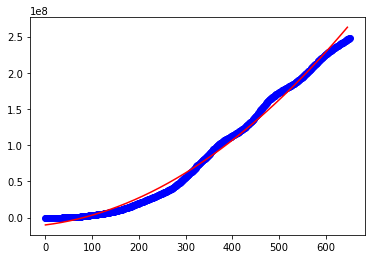

In [24]:

x_axis = np.arange(0, 646, 0.1)
# response = intercept + coef[0][1] * x_axis + coef[0][2] * x_axis**2+ coef[0][3] * x_axis**3 
response = intercept + coef[0][1] * x_axis + coef[0][2] * x_axis**2

# response = intercept + coef[0][1] * x_axis + coef[0][2] * x_axis**2 + coef[0][3] * x_axis**3  + coef[0][4] * x_axis**4

plt.scatter(days_since_1_22, world_cases, color='b')
plt.plot(x_axis, response, color='r')
plt.show()

In [27]:
prediction = poly_model.predict(x_test_poly)
print(1 - (1-r2_score(prediction, y_test_confirmed))*(len(world_cases)-1)/(len(world_cases)-days_since_1_22.shape[1]-1))
# print((1- (r2_score(prediction, y_test_confirmed)))*(len(world_cases)-1)/())
print('MAE:', mean_absolute_error(prediction, y_test_confirmed))
print('RMSE:',math.sqrt(mean_squared_error(prediction, y_test_confirmed)))
print("Cross Validation Score: " +str(np.mean(cross_val_score(poly_model,days_since_1_22 , world_cases, cv=k_fold))))
for i in future_forecast[-10:]:
    print(poly_model.predict(poly.fit_transform([i])))

0.9930650474333285
MAE: 6163253.472215976
RMSE: 7254442.275036095
Cross Validation Score: 0.9500517939369978
[[2.67533189e+08]]
[[2.68303971e+08]]
[[2.69075809e+08]]
[[2.69848703e+08]]
[[2.70622653e+08]]
[[2.7139766e+08]]
[[2.72173723e+08]]
[[2.72950842e+08]]
[[2.73729018e+08]]
[[2.74508249e+08]]


In [30]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(5)}

poly_grid = RandomizedSearchCV(PolynomialRegression(), param_grid, cv=5)
# poly_grid_MAE = RandomizedSearchCV(PolynomialRegression(), param_grid, cv=5, scoring='neg_mean_absolute_error')
# poly_grid_r2 = RandomizedSearchCV(PolynomialRegression(), param_grid, cv=5, scoring='r2')

# poly_grid_RMSE.fit(X_train_confirmed,y_train_confirmed)
# poly_grid_MAE.fit(X_train_confirmed,y_train_confirmed)
# poly_grid_r2.fit(X_train_confirmed,y_train_confirmed)
poly_grid.fit(X_train_confirmed,y_train_confirmed)


C:\Users\wei-d\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures()),
                                             ('linearregression',
                                              LinearRegression())]),
                   param_distributions={'polynomialfeatures__degree': array([0, 1, 2, 3, 4])})

In [32]:

print('best_score:', poly_grid.best_score_)
print('best_params:', poly_grid.best_params_)

best_score: 0.9988123105376427
best_params: {'polynomialfeatures__degree': 4}


In [46]:
poly_2 = PolynomialFeatures(degree = 4)
x_train_poly, x_test_poly = poly_2.fit_transform(X_train_confirmed), poly_2.fit_transform(X_test_confirmed)

polyReg_2 = linear_model.LinearRegression()
poly_model_2 = polyReg_2.fit(x_train_poly,y_train_confirmed)
coef = poly_model_2.coef_
intercept = poly_model.intercept_
coef


array([[ 0.00000000e+00, -1.29370033e+05,  1.02772184e+03,
         4.35604536e-01, -1.27848900e-03]])

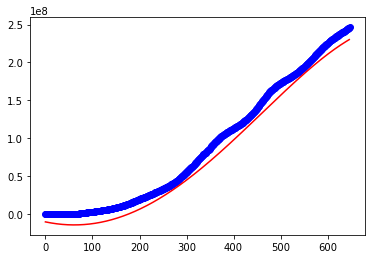

In [50]:

x_axis = np.arange(0, 646, 0.1)
# response = intercept + coef[0][1] * x_axis + coef[0][2] * x_axis**2+ coef[0][3] * x_axis**3 

response = intercept + coef[0][1] * x_axis + coef[0][2] * x_axis**2 + coef[0][3] * x_axis**3  + coef[0][4] * x_axis**4

plt.scatter(days_since_1_22, world_cases, color='b')
plt.plot(x_axis, response, color='r')
plt.show()

In [52]:
prediction = poly_model_2.predict(x_test_poly)
print((1-r2_score(prediction, y_test_confirmed))*(len(world_cases)-1)/(len(world_cases)-days_since_1_22.shape[1]-1))
# print((1- (r2_score(prediction, y_test_confirmed)))*(len(world_cases)-1)/())
print('MAE:', mean_absolute_error(prediction, y_test_confirmed))
print('MSE:',math.sqrt(mean_squared_error(prediction, y_test_confirmed)))
print("Cross Validation Score: " +str(np.mean(cross_val_score(poly_model_2,days_since_1_22 , world_cases, cv=k_fold))))
for i in future_forecast[-10:]:
    print(poly_model.predict(poly.fit_transform([i])))

0.0010418225643631666
MAE: 2153894.255199013
MSE: 2617060.779828088
Cross Validation Score: 0.9490545835779903
[[2.64786978e+08]]
[[2.65557322e+08]]
[[2.66328733e+08]]
[[2.67101211e+08]]
[[2.67874758e+08]]
[[2.68649371e+08]]
[[2.69425053e+08]]
[[2.70201802e+08]]
[[2.70979619e+08]]
[[2.71758503e+08]]


<b>MLP</b>

In [49]:
X_train_sg_confirmed, X_test_sg_confirmed, y_train_sg_confirmed, y_test_sg_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.3)
mlp = MLPClassifier(max_iter=698, activation='relu', hidden_layer_sizes= (32,17), solver="adam",epsilon=1,shuffle=False,learning_rate_init=0.001,batch_size=5)#tried multiple hyper parameter but still not result 
mlp

MLPClassifier(batch_size=5, epsilon=1, hidden_layer_sizes=(32, 17),
              max_iter=698, shuffle=False)

In [50]:
mlp_model = mlp.fit(X_train_sg_confirmed,y_train_sg_confirmed.ravel())

In [51]:
pred = mlp_model.predict(X_test_sg_confirmed)
pred

array([  3281704,   3281704,   3281704,   3281704,  46144922, 158391120,
         3281704,   3281704,   3281704, 158391120,   3281704,   3281704,
         3281704,   3281704,   3281704,   3281704,  11842590,   3281704,
        46144922,   3281704,   3281704,   3281704,   3281704,   3281704,
         3281704,   3281704,   3281704,  16744409,   3281704,   3281704,
         3281704,   3281704,   3281704,   3281704,   3281704,   3281704,
       158391120, 122405442,   3281704,   3281704,   3281704,   3281704,
         3281704,   3281704,   3281704,   3281704,  11842590,   3281704,
        16744409,   3281704,   3281704,  11842590,   3281704,   3281704,
         3281704,   3281704,   3281704,   3281704,   3281704,   3281704,
       158391120,   3281704,   3281704,   3281704,   3281704, 158391120,
         3281704,   3281704,   3281704,   3281704,   3281704,   3281704,
         3281704,  11842590,   3281704, 158391120,   3281704,   3281704,
         3281704,   3281704,   3281704,   3281704, 

In [52]:
mlp_model.score(X_test_sg_confirmed,y_test_sg_confirmed)


0.0

In [53]:
mlp_model.predict(future_forecast[-10:])


array([3281704, 3281704, 3281704, 3281704, 3281704, 3281704, 3281704,
       3281704, 3281704, 3281704], dtype=int64)